# First iteration ( Business as usual )

This first iteration will be characterized by training supervised algorithms pure regression models, i.e. it will not be taken into consideration the sequential nature of the training dataset.

## Load the Data

In [ ]:
#Import the necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime

from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import train_test_split

# create scorer
scorer = make_scorer(mean_absolute_error)

# Load Iquitos preprocessed Data 
dengue_features_train_iq = pd.read_csv("preprocessed data\dengue_features_train_iq.csv")
dengue_labels_train_iq = pd.read_csv("preprocessed data\dengue_labels_train_iq.csv")
dengue_features_test_iq = pd.read_csv("preprocessed data\dengue_features_test_iq.csv")

# drop all columns referencing times
stripped_dengue_features_train_iq = dengue_features_train_iq.drop(['year','weekofyear','week_start_date'], axis=1)
stripped_dengue_labels_train_iq = dengue_labels_train_iq.drop(['year','weekofyear'], axis=1)
stripped_dengue_features_test_iq = dengue_features_test_iq.drop(['year','weekofyear','week_start_date'], axis=1)

# Load San Juan preprocessed Data 
dengue_features_train_sj = pd.read_csv("preprocessed data\dengue_features_train_sj.csv")
dengue_labels_train_sj = pd.read_csv("preprocessed data\dengue_labels_train_sj.csv")
dengue_features_test_sj = pd.read_csv("preprocessed data\dengue_features_test_sj.csv")

stripped_dengue_features_train_sj = dengue_features_train_sj.drop(['year','weekofyear','week_start_date'], axis=1)
stripped_dengue_labels_train_sj = dengue_labels_train_sj.drop(['year','weekofyear'], axis=1)
stripped_dengue_features_test_sj = dengue_features_test_sj.drop(['year','weekofyear','week_start_date'], axis=1)

## Random Forest

### Initialization

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

scorer = make_scorer(mean_absolute_error)

clf = RandomForestRegressor(random_state=42)

# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100, 150, 200]}

### Iquitos

In [ ]:
cv_sets_iq = ShuffleSplit(dengue_features_train_iq.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)
grid_obj_iq = GridSearchCV(clf, param_grid=parameters, scoring=scorer, cv=cv_sets_iq)

grid_fit_iq = grid_obj_iq.fit(stripped_dengue_features_train_iq, dengue_labels_train_iq["total_cases"])

# Get the estimator
best_clf_iq = grid_fit_iq.best_estimator_

# Make predictions using the unoptimized and model
best_predictions_iq = best_clf_iq.predict(stripped_dengue_features_test_iq)
best_predictions_iq  = np.around(best_predictions_iq, decimals=0)
best_predictions_iq = best_predictions_iq.astype(int)

### San Juan

In [ ]:
cv_sets_sj = ShuffleSplit(dengue_features_train_iq.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)
grid_obj_sj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, cv=cv_sets_sj)

grid_fit_sj = grid_obj_sj.fit(stripped_dengue_features_train_sj, dengue_labels_train_sj["total_cases"])

# Get the estimator
best_clf_sj = grid_fit_sj.best_estimator_

# Make predictions using the unoptimized and model
best_predictions_sj = best_clf_sj.predict(stripped_dengue_features_test_sj)
best_predictions_sj  = np.around(best_predictions_sj, decimals=0)
best_predictions_sj = best_predictions_sj.astype(int)

### Create Random Forest Submission File

In [ ]:
# San Juan - city,year,weekofyear,total_cases
submission_sj = dengue_features_test_sj[['year','weekofyear']]
submission_sj.insert( 0,'city','sj')

df_best_predictions_sj = pd.DataFrame(best_predictions_sj, columns=['total_cases'])
submission_sj = pd.concat([submission_sj, df_best_predictions_sj], axis=1)

# Iquitos - city,year,weekofyear,total_cases
submission_iq = dengue_features_test_iq[['year','weekofyear']]
submission_iq.insert( 0,'city','iq')

df_best_predictions_iq = pd.DataFrame(best_predictions_iq, columns=['total_cases'])
submission_iq = pd.concat([submission_iq, df_best_predictions_iq], axis=1)

# join both predictions
submission = pd.concat([submission_sj, submission_iq])
submission = submission.reset_index(drop = True)

#write into csv
submission.to_csv("Submission\Submission_1_RandomDecistion.csv", encoding='utf-8', index=False)

### Submission Score 

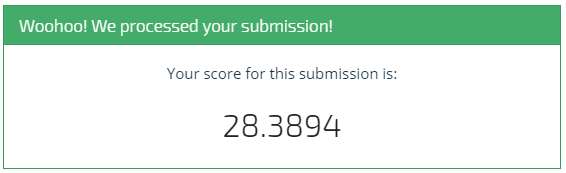

## Ensemble AdaBoost

### Initialization

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

clf = AdaBoostRegressor(random_state=42)

# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100, 150, 200], 'learning_rate' : [0.75, 1, 1.25]}

### Iquitos

In [ ]:
cv_sets_iq = ShuffleSplit(dengue_features_train_iq.shape[0], n_iter = 10, test_size = 0.2, random_state = 42)

grid_obj_iq = GridSearchCV(clf, param_grid=parameters, scoring=scorer, cv=cv_sets_iq)

grid_fit_iq = grid_obj_iq.fit(stripped_dengue_features_train_iq, dengue_labels_train_iq["total_cases"])

# Get the estimator
best_clf_iq = grid_fit_iq.best_estimator_

# Make predictions using the unoptimized and model
best_predictions_iq = best_clf_iq.predict(stripped_dengue_features_test_iq)
best_predictions_iq  = np.around(best_predictions_iq, decimals=0)
best_predictions_iq = best_predictions_iq.astype(int)

### San Juan

In [ ]:
cv_sets_sj = ShuffleSplit(dengue_features_train_iq.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

grid_obj_sj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, cv=cv_sets_sj)

grid_fit_sj = grid_obj_sj.fit(stripped_dengue_features_train_sj, dengue_labels_train_sj["total_cases"])

# Get the estimator
best_clf_sj = grid_fit_sj.best_estimator_

# Make predictions using the unoptimized and model
best_predictions_sj = best_clf_sj.predict(stripped_dengue_features_test_sj)
best_predictions_sj  = np.around(best_predictions_sj, decimals=0)
best_predictions_sj = best_predictions_sj.astype(int)

### Create AdaBoost Submission File

In [ ]:
# San Juan - city,year,weekofyear,total_cases
submission_sj = dengue_features_test_sj[['year','weekofyear']]
submission_sj.insert( 0,'city','sj')

df_best_predictions_sj = pd.DataFrame(best_predictions_sj, columns=['total_cases'])
submission_sj = pd.concat([submission_sj, df_best_predictions_sj], axis=1)

# Iquitos - city,year,weekofyear,total_cases
submission_iq = dengue_features_test_iq[['year','weekofyear']]
submission_iq.insert( 0,'city','iq')

df_best_predictions_iq = pd.DataFrame(best_predictions_iq, columns=['total_cases'])
submission_iq = pd.concat([submission_iq, df_best_predictions_iq], axis=1)

# join both predictions
submission = pd.concat([submission_sj, submission_iq])
submission = submission.reset_index(drop = True)

#write into csv
submission.to_csv("Submission\Submission_1_AdaBoost.csv", encoding='utf-8', index=False)

### AdaBoost Submission Score 

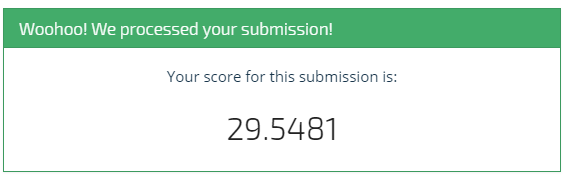

## Long Short-Term Memory (LSTM)

### Initialization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from keras.regularizers import L1L2

reg = L1L2(l1=0.0, l2=0.00001)

columns_to_scale = ['D1', 'D2','D3', 'D4','D5', 'D6']

# Initialize a scaler and apply it to the features
scaler = MinMaxScaler(feature_range=(0, 1)) # default=(0, 1)

### Iquitos

In [ ]:
# Normalization should be done on both, train and test features datasets, ensuring that the values in both datasets 
# remain of same magnitude. Therefore these datasets will be joined, applied the minmax normalization, and then splitted.
stripped_dengue_features_train_iq['data_set'] = 'train'
stripped_dengue_features_test_iq['data_set']  = 'test'

dengue_norm_features_iq  = stripped_dengue_features_train_iq.append(stripped_dengue_features_test_iq)
dengue_norm_features_iq[columns_to_scale] = scaler.fit_transform(dengue_norm_features_iq[columns_to_scale])

# separate into the original datasets, dropping the temporary columns 'dataset'
stripped_norm_dengue_features_train_iq = dengue_norm_features_iq[dengue_norm_features_iq['data_set'] == 'train']
stripped_norm_dengue_features_train_iq = stripped_norm_dengue_features_train_iq.reset_index(drop = True)
stripped_norm_dengue_features_train_iq = stripped_norm_dengue_features_train_iq.drop(['data_set'], axis=1)

stripped_norm_dengue_features_test_iq = dengue_norm_features_iq[dengue_norm_features_iq['data_set'] == 'test']
stripped_norm_dengue_features_test_iq = stripped_norm_dengue_features_test_iq.reset_index(drop = True)
stripped_norm_dengue_features_test_iq = stripped_norm_dengue_features_test_iq.drop(['data_set'], axis=1)

# normalize labels
scalerLabels_iq = scaler.fit(stripped_dengue_labels_train_iq)
stripped_norm_dengue_labels_train_iq = scalerLabels_iq.fit_transform(stripped_dengue_labels_train_iq)

# split data into train and test
X_train, X_test = np.split(stripped_norm_dengue_features_train_iq, [int(.8*len(stripped_norm_dengue_features_train_iq))])
y_train, y_test = np.split(stripped_norm_dengue_labels_train_iq, [int(.8*len(stripped_norm_dengue_labels_train_iq))])

X_train = X_train.values
X_test = X_test.values
X_submission = stripped_norm_dengue_features_test_iq.values

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_submission = X_submission.reshape((X_submission.shape[0], 1, X_submission.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_submission.shape)

#design network
model = Sequential()
model.add(LSTM(120, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu', kernel_regularizer=reg))
model.add(LSTM(240, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu', kernel_regularizer=reg))
model.add(LSTM(120, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=reg))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mse', optimizer='adam')

In [ ]:
# train model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.attempt1.iq.hdf5', verbose=2, 
                               save_best_only=True)

# fit network       
history = model.fit(X_train, y_train, epochs=100, batch_size=51, validation_data=(X_test, y_test), verbose=0, shuffle=False,
                    callbacks=[checkpointer])

In [ ]:
# load best weights
model.load_weights('saved_models/weights.best.attempt1.iq.hdf5')

# make a prediction
y_submission = model.predict(X_submission)

# invert scaling for forecast
y_submission = scalerLabels_iq.inverse_transform(y_submission)
y_submission_iq = np.around(y_submission, decimals=0)
y_submission_iq = y_submission_iq.astype(int)

### San Juan

In [ ]:
# Normalization should be done on both, train and test features datasets, ensuring that the values in both datasets 
# remain of same magnitude. Therefore these datasets will be joined, applied the minmax normalization, and then splitted.
stripped_dengue_features_train_sj['data_set'] = 'train'
stripped_dengue_features_test_sj['data_set']  = 'test'

dengue_norm_features_sj  = stripped_dengue_features_train_sj.append(stripped_dengue_features_test_sj)
dengue_norm_features_sj[columns_to_scale] = scaler.fit_transform(dengue_norm_features_sj[columns_to_scale])

# separate into the original datasets, dropping the temporary columns 'dataset'
stripped_norm_dengue_features_train_sj = dengue_norm_features_sj[dengue_norm_features_sj['data_set'] == 'train']
stripped_norm_dengue_features_train_sj = stripped_norm_dengue_features_train_sj.reset_index(drop = True)
stripped_norm_dengue_features_train_sj = stripped_norm_dengue_features_train_sj.drop(['data_set'], axis=1)

stripped_norm_dengue_features_test_sj = dengue_norm_features_sj[dengue_norm_features_sj['data_set'] == 'test']
stripped_norm_dengue_features_test_sj = stripped_norm_dengue_features_test_sj.reset_index(drop = True)
stripped_norm_dengue_features_test_sj = stripped_norm_dengue_features_test_sj.drop(['data_set'], axis=1)

# normalize labels
scalerLabels_sj = scaler.fit(stripped_dengue_labels_train_sj)
stripped_norm_dengue_labels_train_sj = scalerLabels_sj.fit_transform(stripped_dengue_labels_train_sj)

# split data into train and test
X_train, X_test = np.split(stripped_norm_dengue_features_train_sj, [int(.8*len(stripped_norm_dengue_features_train_sj))])
y_train, y_test = np.split(stripped_norm_dengue_labels_train_sj, [int(.8*len(stripped_norm_dengue_labels_train_sj))])

X_train = X_train.values
X_test = X_test.values
X_submission = stripped_norm_dengue_features_test_sj.values

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_submission = X_submission.reshape((X_submission.shape[0], 1, X_submission.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_submission.shape)

#design network
model = Sequential()
model.add(LSTM(120, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu', kernel_regularizer=reg))
model.add(LSTM(240, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu', kernel_regularizer=reg))
model.add(LSTM(120, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=reg))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mse', optimizer='adam')

In [ ]:
# fit network
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.attempt1.sj.hdf5', verbose=2, 
                               save_best_only=True)
        
history = model.fit(X_train, y_train, epochs=100, batch_size=51, validation_data=(X_test, y_test), verbose=0, shuffle=False,
                    callbacks=[checkpointer])

In [ ]:
# load best weights
model.load_weights('saved_models/weights.best.attempt1.sj.hdf5')

# make a prediction
y_submission = model.predict(X_submission)

# invert scaling for forecast
y_submission = scalerLabels_iq.inverse_transform(y_submission)
y_submission_sj = np.around(y_submission, decimals=0)
y_submission_sj = y_submission_sj.astype(int)

### Create LSTM Submission File

In [ ]:
# San Juan - city,year,weekofyear,total_cases
submission_sj = dengue_features_test_sj[['year','weekofyear']]
submission_sj.insert( 0,'city','sj')

df_y_submission_sj = pd.DataFrame(y_submission_sj, columns=['total_cases'])
submission_sj = pd.concat([submission_sj, df_y_submission_sj], axis=1)

# Iquitos - city,year,weekofyear,total_cases
submission_iq = dengue_features_test_iq[['year','weekofyear']]
submission_iq.insert( 0,'city','iq')

df_y_submission_iq = pd.DataFrame(y_submission_iq, columns=['total_cases'])
submission_iq = pd.concat([submission_iq, df_y_submission_iq], axis=1)

# join both predictions
submission = pd.concat([submission_sj, submission_iq])
submission = submission.reset_index(drop = True)

#write into csv
submission.to_csv("Submission\Submission_1_lstm.csv", encoding='utf-8', index=False)

### LSTM Submission Score 

#### Without kernel regularizer and Batch Size 16:
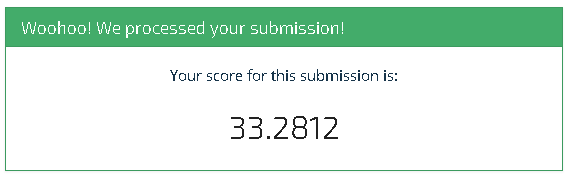

#### Wit kernel regularizer and Batch Size 51:
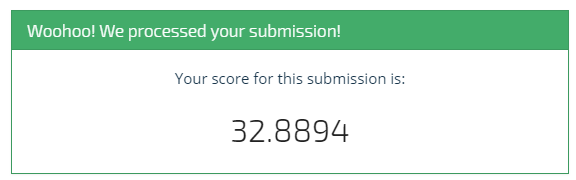

## Sequence classification with 1D convolutions

### Initialization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint

columns_to_scale = ['D1', 'D2','D3', 'D4','D5', 'D6']

# Initialize a scaler and apply it to the features
scaler = MinMaxScaler(feature_range=(0, 1)) # default=(0, 1)

### Iquitos

In [ ]:
# Normalization should be done on both, train and test features datasets, ensuring that the values in both datasets 
# remain of same magnitude. Therefore these datasets will be joined, applied the minmax normalization, and then splitted.
stripped_dengue_features_train_iq['data_set'] = 'train'
stripped_dengue_features_test_iq['data_set']  = 'test'

dengue_norm_features_iq  = stripped_dengue_features_train_iq.append(stripped_dengue_features_test_iq)
dengue_norm_features_iq[columns_to_scale] = scaler.fit_transform(dengue_norm_features_iq[columns_to_scale])

# separate into the original datasets, dropping the temporary columns 'dataset'
stripped_norm_dengue_features_train_iq = dengue_norm_features_iq[dengue_norm_features_iq['data_set'] == 'train']
stripped_norm_dengue_features_train_iq = stripped_norm_dengue_features_train_iq.reset_index(drop = True)
stripped_norm_dengue_features_train_iq = stripped_norm_dengue_features_train_iq.drop(['data_set'], axis=1)

stripped_norm_dengue_features_test_iq = dengue_norm_features_iq[dengue_norm_features_iq['data_set'] == 'test']
stripped_norm_dengue_features_test_iq = stripped_norm_dengue_features_test_iq.reset_index(drop = True)
stripped_norm_dengue_features_test_iq = stripped_norm_dengue_features_test_iq.drop(['data_set'], axis=1)

# normalize labels
scalerLabels_iq = scaler.fit(stripped_dengue_labels_train_iq)
stripped_norm_dengue_labels_train_iq = scalerLabels_iq.fit_transform(stripped_dengue_labels_train_iq)

# split data into train and test
X_train, X_test = np.split(stripped_norm_dengue_features_train_iq, [int(.8*len(stripped_norm_dengue_features_train_iq))])
y_train, y_test = np.split(stripped_norm_dengue_labels_train_iq, [int(.8*len(stripped_norm_dengue_labels_train_iq))])

X_train = X_train.values
X_test = X_test.values
X_submission = stripped_norm_dengue_features_test_iq.values

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_submission = X_submission.reshape((X_submission.shape[0], X_submission.shape[1], 1))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_submission.shape)

model = Sequential()
model.add(Conv1D(96, 2, activation='relu', input_shape=( X_train.shape[1], 1)))
model.add(Conv1D(96, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(192, 2, activation='relu'))
model.add(Conv1D(192, 2, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.conv1D.b32.attempt1.iq.hdf5', verbose=2, 
                               save_best_only=True)
        
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0, shuffle=False,
                    callbacks=[checkpointer])

In [ ]:
# load best weights
model.load_weights('saved_models/weights.conv1D.b32.attempt1.iq.hdf5')

# make a prediction
y_submission = model.predict(X_submission)

# invert scaling for forecast
y_submission = scalerLabels_iq.inverse_transform(y_submission)
y_submission_iq = np.around(y_submission, decimals=0)
y_submission_iq = y_submission_iq.astype(int)

### San Juan

In [ ]:
# Normalization should be done on both, train and test features datasets, ensuring that the values in both datasets 
# remain of same magnitude. Therefore these datasets will be joined, applied the minmax normalization, and then splitted.
stripped_dengue_features_train_sj['data_set'] = 'train'
stripped_dengue_features_test_sj['data_set']  = 'test'

dengue_norm_features_sj  = stripped_dengue_features_train_sj.append(stripped_dengue_features_test_sj)
dengue_norm_features_sj[columns_to_scale] = scaler.fit_transform(dengue_norm_features_sj[columns_to_scale])

# separate into the original datasets, dropping the temporary columns 'dataset'
stripped_norm_dengue_features_train_sj = dengue_norm_features_sj[dengue_norm_features_sj['data_set'] == 'train']
stripped_norm_dengue_features_train_sj = stripped_norm_dengue_features_train_sj.reset_index(drop = True)
stripped_norm_dengue_features_train_sj = stripped_norm_dengue_features_train_sj.drop(['data_set'], axis=1)

stripped_norm_dengue_features_test_sj = dengue_norm_features_sj[dengue_norm_features_sj['data_set'] == 'test']
stripped_norm_dengue_features_test_sj = stripped_norm_dengue_features_test_sj.reset_index(drop = True)
stripped_norm_dengue_features_test_sj = stripped_norm_dengue_features_test_sj.drop(['data_set'], axis=1)

# normalize labels
scalerLabels_sj = scaler.fit(stripped_dengue_labels_train_sj)
stripped_norm_dengue_labels_train_sj = scalerLabels_sj.fit_transform(stripped_dengue_labels_train_sj)

# split data into train and test
X_train, X_test = np.split(stripped_norm_dengue_features_train_sj, [int(.8*len(stripped_norm_dengue_features_train_sj))])
y_train, y_test = np.split(stripped_norm_dengue_labels_train_sj, [int(.8*len(stripped_norm_dengue_labels_train_sj))])

X_train = X_train.values
X_test = X_test.values
X_submission = stripped_norm_dengue_features_test_sj.values

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_submission = X_submission.reshape((X_submission.shape[0], X_submission.shape[1], 1))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_submission.shape)

model = Sequential()
model.add(Conv1D(96, 2, activation='relu', input_shape=( X_train.shape[1], 1)))
model.add(Conv1D(96, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(192, 2, activation='relu'))
model.add(Conv1D(192, 2, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.conv1D.b32.attempt1.sj.hdf5', verbose=2, 
                               save_best_only=True)
        
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0, shuffle=False,
                    callbacks=[checkpointer])

In [ ]:
# load best weights
model.load_weights('saved_models/weights.conv1D.b32.attempt1.sj.hdf5')

# make a prediction
y_submission = model.predict(X_submission)

# invert scaling for forecast
y_submission = scalerLabels_iq.inverse_transform(y_submission)
y_submission_sj = np.around(y_submission, decimals=0)
y_submission_sj = y_submission_sj.astype(int)

### Create Conv1 Submission File

In [ ]:
# San Juan - city,year,weekofyear,total_cases
submission_sj = dengue_features_test_sj[['year','weekofyear']]
submission_sj.insert( 0,'city','sj')

df_y_submission_sj = pd.DataFrame(y_submission_sj, columns=['total_cases'])
submission_sj = pd.concat([submission_sj, df_y_submission_sj], axis=1)

# Iquitos - city,year,weekofyear,total_cases
submission_iq = dengue_features_test_iq[['year','weekofyear']]
submission_iq.insert( 0,'city','iq')

df_y_submission_iq = pd.DataFrame(y_submission_iq, columns=['total_cases'])
submission_iq = pd.concat([submission_iq, df_y_submission_iq], axis=1)

# join both predictions
submission = pd.concat([submission_sj, submission_iq])
submission = submission.reset_index(drop = True)

#write into csv
submission.to_csv("Submission\Submission_1_conv1d_batch32.csv", encoding='utf-8', index=False)

### Conv1D Submission Score 

#### Without kernel regularizer and Batch Size 16:
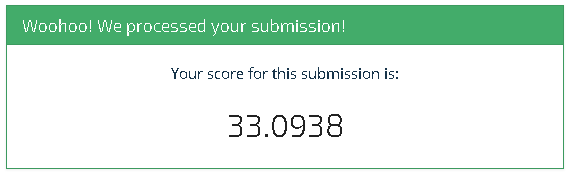

#### Without kernel regularizer and Batch Size 32: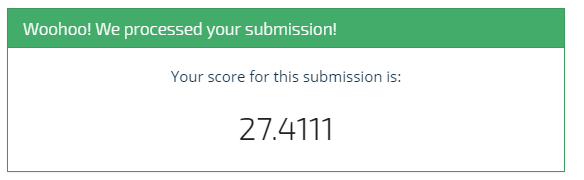